## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#library which we required for analysis

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#upload database

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

In [10]:
# top 2 rows 

In [11]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [12]:
#count total no. of rows and columns

In [13]:
df.shape

(119390, 32)

In [14]:
'''decide which columns we want and which ones we drop from our analysis'''

'decide which columns we want and which ones we drop from our analysis'

In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [17]:
# we get null  value from country,agent,company,
# so we required to handel null value from dataset

In [82]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
df.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [19]:
# handeling of null values

In [20]:
df['country'].fillna(0, inplace=True)


In [21]:
df['agent'].fillna(0, inplace=True)


In [22]:
df['company'].fillna(0, inplace=True)


In [86]:
'''check is any null value is remain to handle'''


'check is any null value is remain to handle'

In [83]:
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [25]:
#Making new column indicating:
#1-------> Reserved room and assigned room were 'same'
#0-------> Reserved room and assigned room were 'different'

In [26]:
df['same_room'] = np.where(df['reserved_room_type']==df['assigned_room_type'], 
                                           '1', '0')

In [27]:
df['same_room'].value_counts()


1    104473
0     14917
Name: same_room, dtype: int64

In [28]:
# same room as assign = 104473
# and diff. =  14917

In [29]:
#Here is datatpye some of the column is written as int but it would be wise if we take it as category for instance 'is_canceled', 'same_room' etc


In [30]:
cat_columns=["hotel","arrival_date_month","meal","country","market_segment","is_canceled","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","is_repeated_guest",'same_room']


In [31]:
#Analysis

In [32]:
'''yearwise booking'''

'yearwise booking'

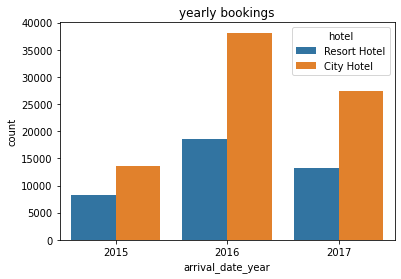

In [33]:
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('yearly bookings')
plt.rcParams['figure.figsize'] = (7, 5)


In [34]:
#colclusion: Bookings across years is higher for city hotel than resort hotel and donot increase proportionately over the years

In [35]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['figure.facecolor'] = '#00000000'


In [36]:
'''monthwise booking'''

'monthwise booking'

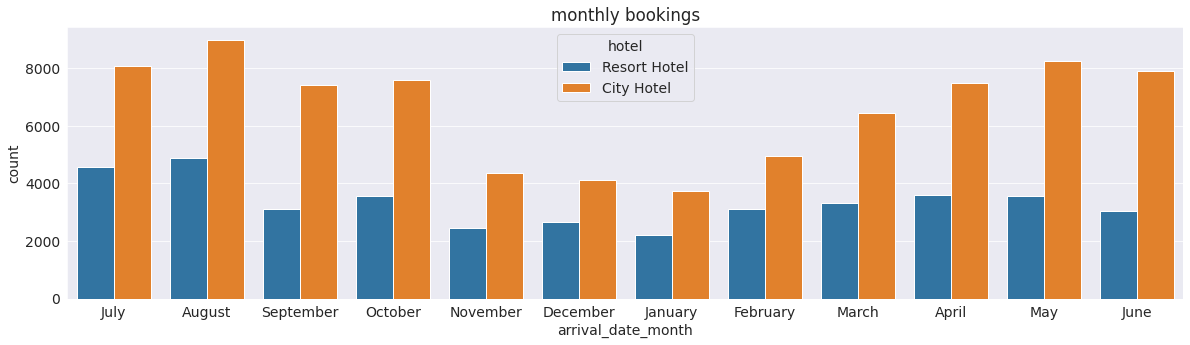

In [37]:
sns.countplot (x= 'arrival_date_month', data= df, hue= 'hotel').set_title ('monthly bookings')
plt.rcParams['figure.figsize'] = (25, 5)



In [38]:
#conclusion: Bookings across year is higher for city hotel.
# city hotel booking is incresing from januart to jun then decrese booking.

In [39]:
''' most of guests comming from which country'''

' most of guests comming from which country'

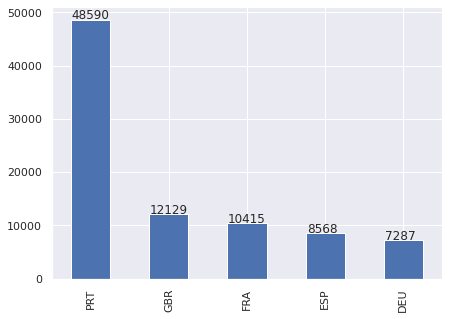

In [67]:
ax= df.country.value_counts().head(5).plot (kind= 'bar');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
## most

In [41]:
'''booking cancellations'''

'booking cancellations'

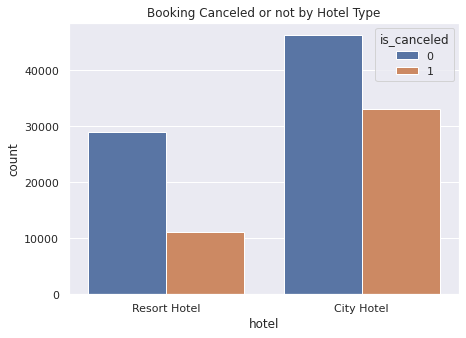

In [70]:
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = df)
plt.rcParams['figure.figsize'] = (8, 5)

In [43]:
'''1-------> Reserved room and assigned room were 'same'
0-------> Reserved room and assigned room were 'different'''

"1-------> Reserved room and assigned room were 'same'\n0-------> Reserved room and assigned room were 'different"

In [44]:
#conclusion the number of canceled 
#the number of cancelation of room  less wher the Reserved rome is same to assign room  compair to differnt assign room

In [45]:
''' Segments wise booking'''

' Segments wise booking'

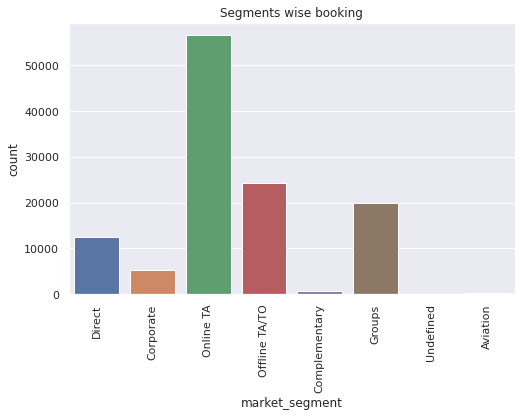

In [71]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (8, 5)
plt.show()

In [47]:
#conclusion:- online and offline travel agents booking is higher compair to other,,,,

In [48]:
'''Type of meal booked'''

'Type of meal booked'

In [49]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


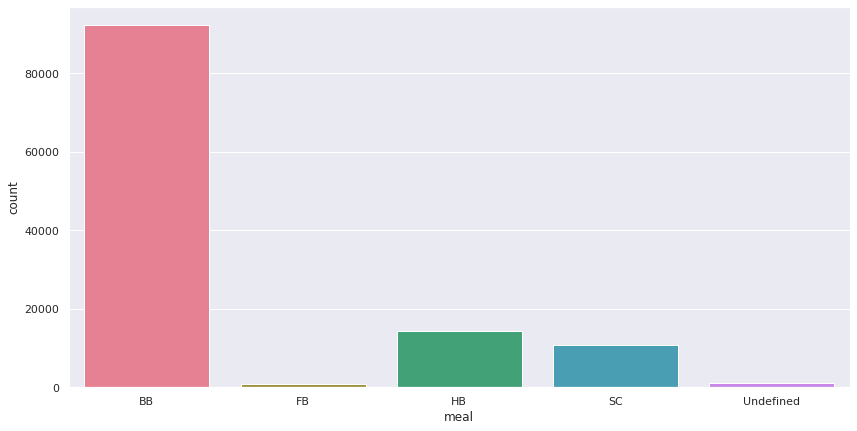

In [72]:
plt.figure(figsize=(14,7))
sns.countplot(df['meal'], palette='husl')
plt.rcParams['figure.figsize'] = (8, 5)
plt.show()

In [51]:
# most of customers order Type of meal booked,then 
#FB means full board then 
#SC is Senior Cycle

In [52]:
'''Reserved Room type'''


'Reserved Room type'

In [53]:
df.reserved_room_type.value_counts(normalize=True)


A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


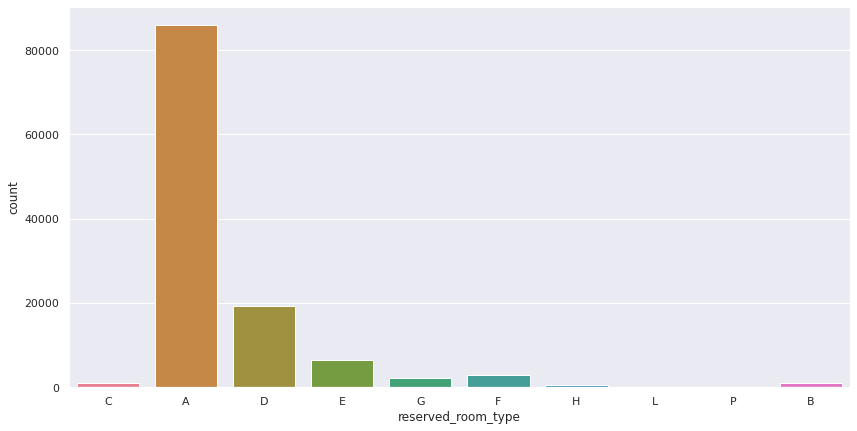

In [54]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

In [55]:
# most of customerse reserved room is class 'A' type

In [ ]:
 '''Customer Type'''

In [73]:
df.customer_type.value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


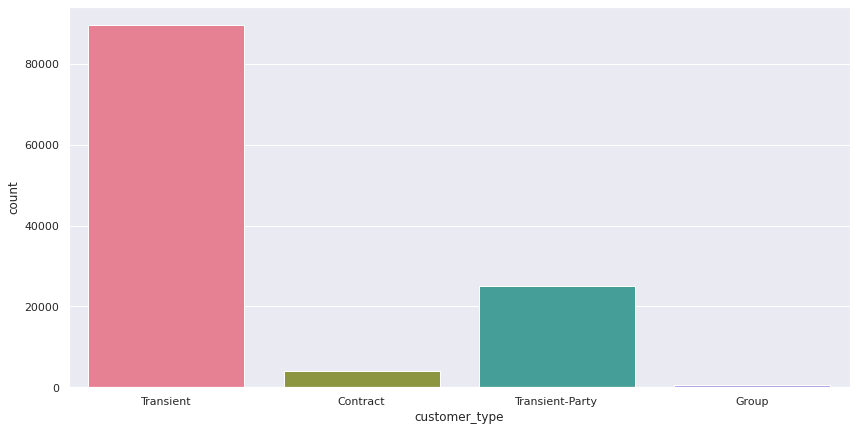

In [81]:
plt.figure(figsize=(14,7))
sns.countplot(df['customer_type'], palette='husl')
plt.show()

In [75]:
##most of customers is Transient type

In [56]:
'''Deposit Type'''


'Deposit Type'

In [57]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


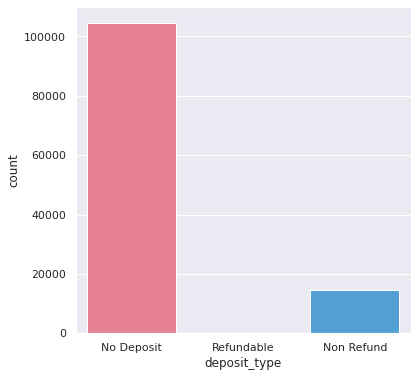

In [58]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

In [59]:
# most of booking is no deposite

In [60]:
'''Average Daily Rate (ADR)'''


'Average Daily Rate (ADR)'

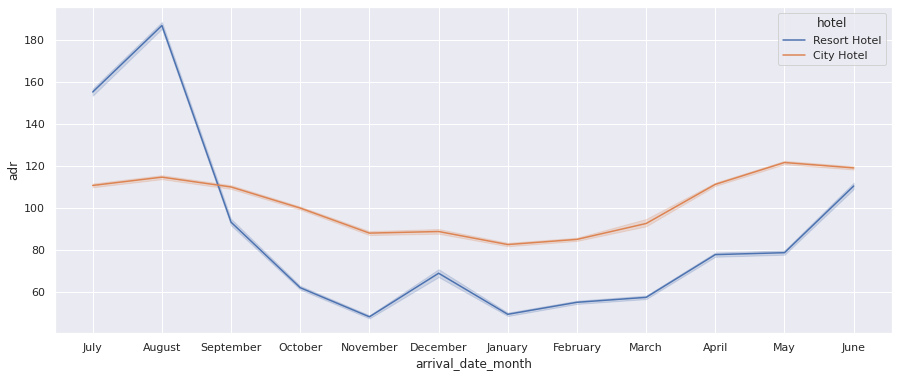

In [61]:
plt.figure(figsize=(15,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()


In [62]:
# in august resort hotel ADR is high, then start decrese till november then slitly increse month by month 
# ADR of city hotel is average over all year 

In [63]:
'''corelation heatmap'''

'corelation heatmap'

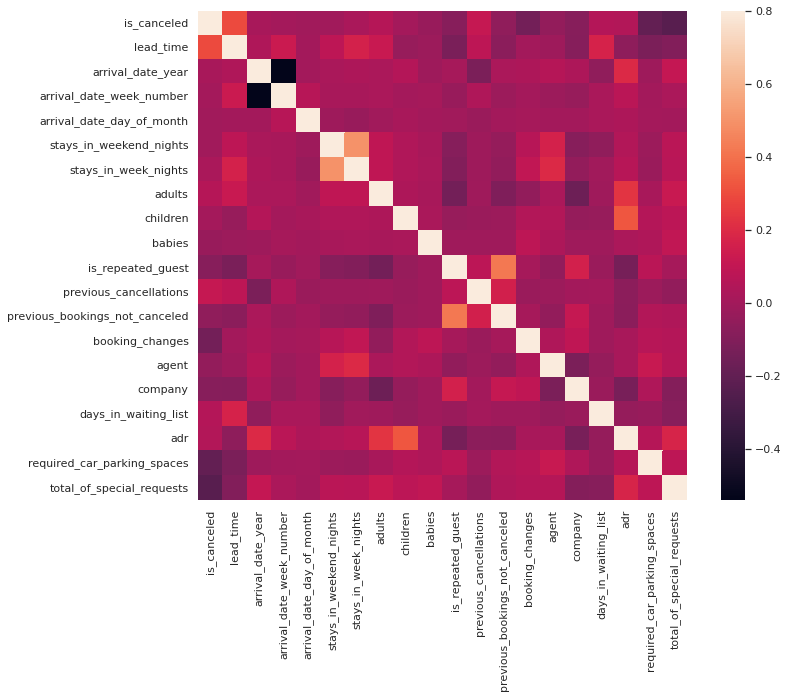

In [64]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [65]:
#Conclusion